**Importing Keras libraries**


In [13]:
import keras

In [21]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [23]:
from twilio.rest import Client

**Importing ImageDataGenerator from Keras**

In [11]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

**Defining the Parameters**

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

**Applying ImageDataGenerator functionality to train dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


**Applying ImageDataGenerator functionality to test dataset**

In [15]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


**Importing Model Building Libraries**

In [4]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

**Initializing the model**

In [5]:
model=Sequential()

**Adding CNN Layers**

In [6]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

**Add Dense layers**

In [7]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

**Configuring the learning process**

In [8]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

**Training the model**

In [22]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 111s 8s/step - loss: 2.3692 - accuracy: 0.6858 - val_loss: 0.1649 - val_accuracy: 0.9504
Epoch 2/10
14/14 [==============================] - 30s 2s/step - loss: 0.3151 - accuracy: 0.8761 - val_loss: 0.1472 - val_accuracy: 0.9421
Epoch 3/10
14/14 [==============================] - 30s 2s/step - loss: 0.2084 - accuracy: 0.9243 - val_loss: 0.1197 - val_accuracy: 0.9752
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.1834 - accuracy: 0.9243 - val_loss: 0.0935 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 28s 2s/step - loss: 0.1664 - accuracy: 0.9335 - val_loss: 0.0815 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 33s 2s/step - loss: 0.1681 - accuracy: 0.9243 - val_loss: 0.1096 - val_accuracy: 0.9256
Epoch 7/10
14/14 [==============================] - 30s 2s/step - loss: 0.1786 - accuracy: 0.9197 - val_loss: 0.0951 - val_accuracy: 0.9421
Epoch 8/10
14/14 [=

**Save the model**

In [9]:
model.save("forest.h5")

**Predictions**

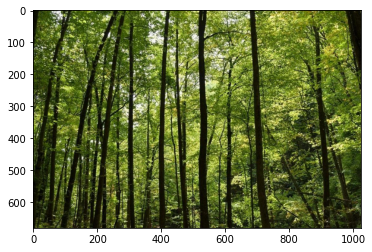

In [19]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model('forest.h5')
img=image.load_img('/content/drive/MyDrive/drive/dataset/Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg')
x=image.img_to_array(img)
plt.imshow(img)
plt.show()
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [20]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 297ms/step


0

In [24]:
if pred==1:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='ACd09c7dfa196789687483788953bc13024c09a'
  auth_token='e9b6b25a77c65fg33643746ge0ba0b755'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+16075363954',
      #to number
      to='+917639764251')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==0:
  print('No Fire')

No Fire
